<a href="https://colab.research.google.com/github/BraulioHermanson/Machine-Learning-Project/blob/main/Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with PyCaret


I will create a Machine Learning model using the library Pycaret, focusing on the [classification](https://pycaret.gitbook.io/docs/get-started/quickstart#classification) model. 

The dataset that I will use would be the [Fetal Health from Kaggle](https://www.kaggle.com/andrewmvd/fetal-health-classification) and the column target here it will be the `Fetal Health`

In [1]:
# install pycaret
!pip install pycaret -q

In [2]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [3]:
# Import Libraries
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning) 

# import other features
from IPython.core.pylabtools import figsize

sns.set_style('white')
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/BraulioHermanson/P_datasets/main/fetal_health.csv')

# Data Analysis

This dataset doesn't have categorical features  and missing values.

But look at the [site](https://www.kaggle.com/andrewmvd/fetal-health-classification)
we can read that the feature `fetal_health` has this combination:
 1 = NORMAL, 2 = SUSPECT and 3 = PATHOLOGICAL.
 
 Then I will use this replacement in the feature `fetal_health` after I finish the EDA.

In [5]:
print('Dim of dataset',
  '\nFeatures: ',df.shape[1], '\n'
  'Samples: ',df.shape[0])
df.head()

Dim of dataset 
Features:  22 
Samples:  2126


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0

In [6]:
df.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
2121                                               25.0        
2122                                               22.0        
2123                                               20.0        
2124                                               27.0        
2125                                               36.0        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
2121                                  7.2             40.0          137.0   
2122                                  7.1             66.0          103.0   
2123                                  6.1             67.0          103.0   
2124                                  7.0             66.0          103.0   
2125                                  5.0             42.0          117.0   

      histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
2121          177.0                        4.0                         0.0   
2122          169.0                        6.0                         0.0   
2123          170.0                        5.0                         0.0   
2124          169.0                        6.0                         0.0   
2125          159.0                        2.0                         1.0   

      histogram_mode  histogram_mean  histogram_median  histogram_variance  \
2121           153.0           150.0             152.0                 2.0   
2122           152.0           148.0             151.0                 3.0   
2123           153.0           148.0             152.0                 4.0   
2124           152.0           147.0             151.0                 4.0   
2125           145.0           143.0             145.0                 1.0   

      histogram_tendency  fetal_health  
2121                 0.0           2.0  
2122                 1.0           2.0  
2123                 1.0           2.0  
2124                 1.0           2.0  
2125                 0.0           1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  \
count                                         2126.00000        
mean                                             9.84666        
std                                             18.39688        
min                                              0.00000        
25%                                              0.00000        
50%                                              0.00000        
75%                                             11.00000        
max                                             91.00000        

       mean_value_of_long_term_variability  histogram_width  histogram_min  \
count                          2126.000000      2126.000000    2126.000000   
mean                              8.187629        70.445908      93.579492   
std                               5.628247        38.955693      29.560212   
min                               0.000000         3.000000      50.000000   
25%                               4.600000        37.000000      67.000000   
50%                               7.400000        67.500000      93.000000   
75%                              10.800000       100.000000     120.000000   
max                              50.700000       180.000000     159.000000   

       histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
count    2126.000000                2126.000000                 2126.000000   
mean      164.025400                   4.068203                    0.323612   
std        17.944183                   2.949386                    0.706059   
min       122.000000                   0.000000                    0.000000   
25%       152.000000                   2.000000                    0.000000   
50%       162.000000                   3.000000                    0.000000   
75%       174.000000                  

# Exploratory Data Analysis

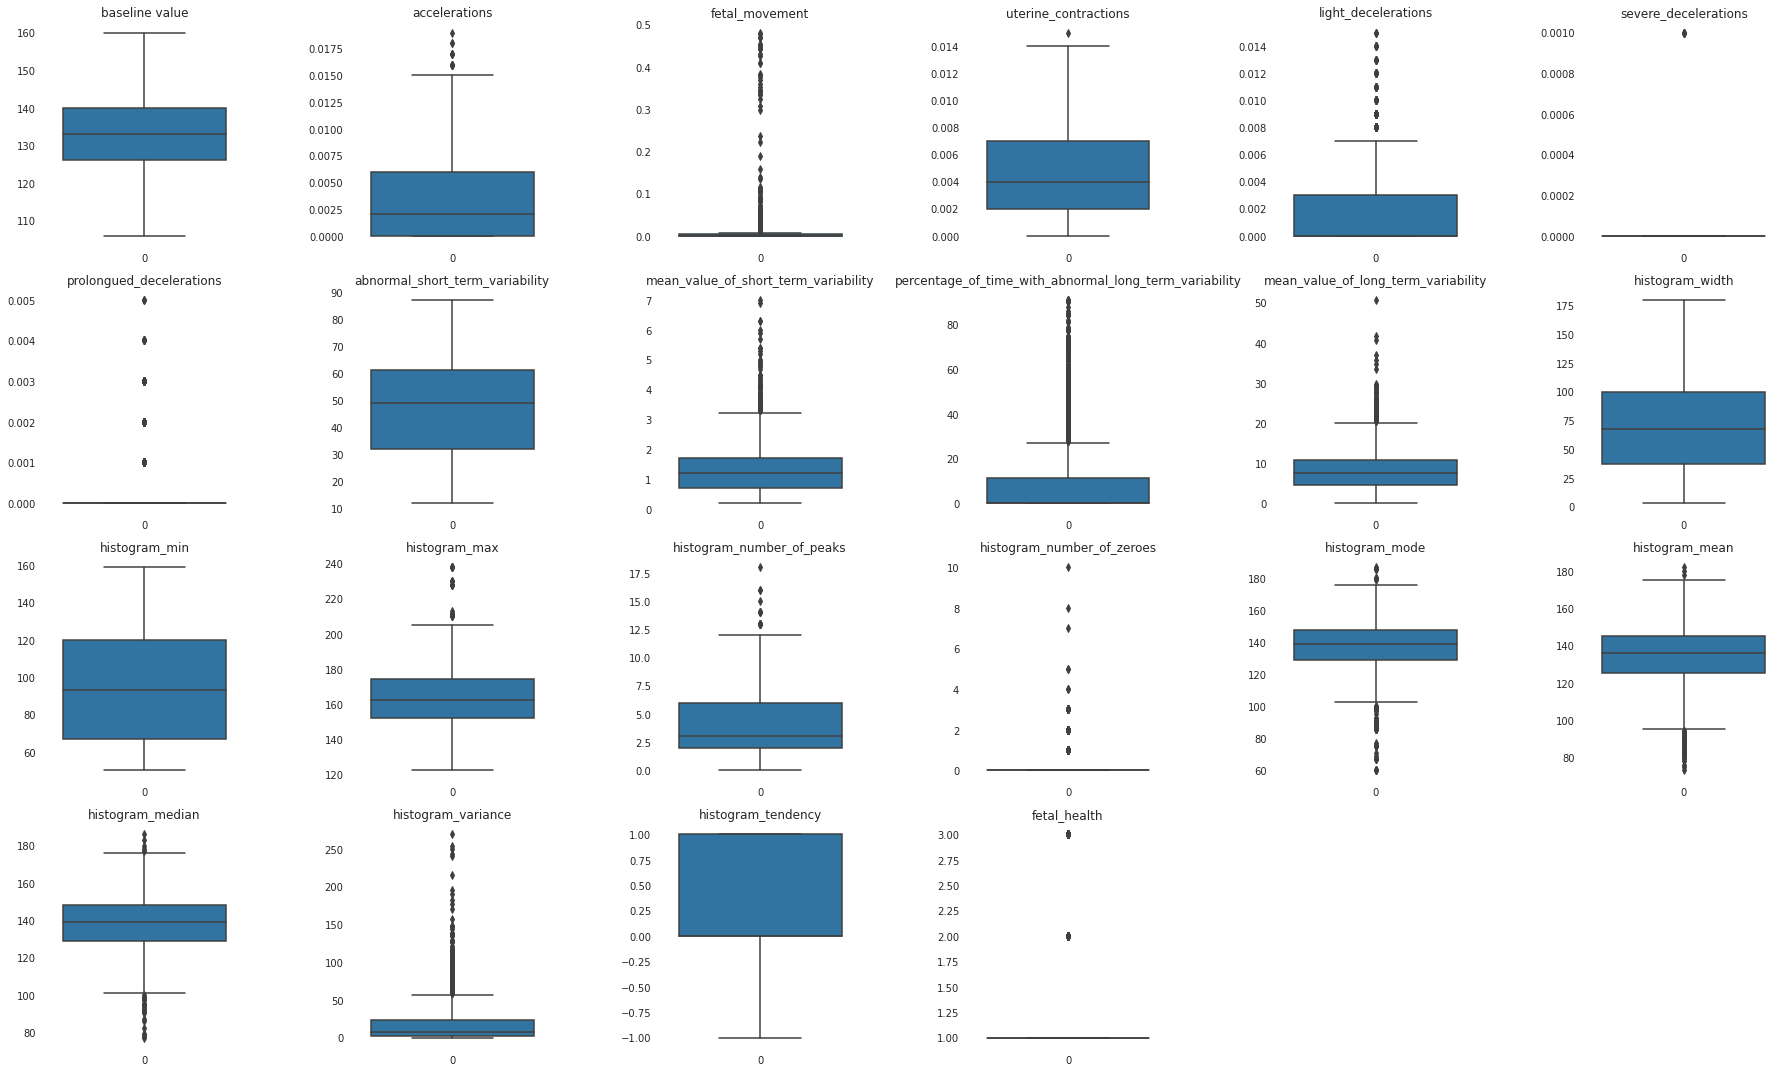

In [9]:
plt.figure(figsize=(25,15))

for i, column in enumerate(df.columns):
  plt.subplot(4,6,i+1)
  sns.boxplot(data=df[column])
  plt.title(column)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

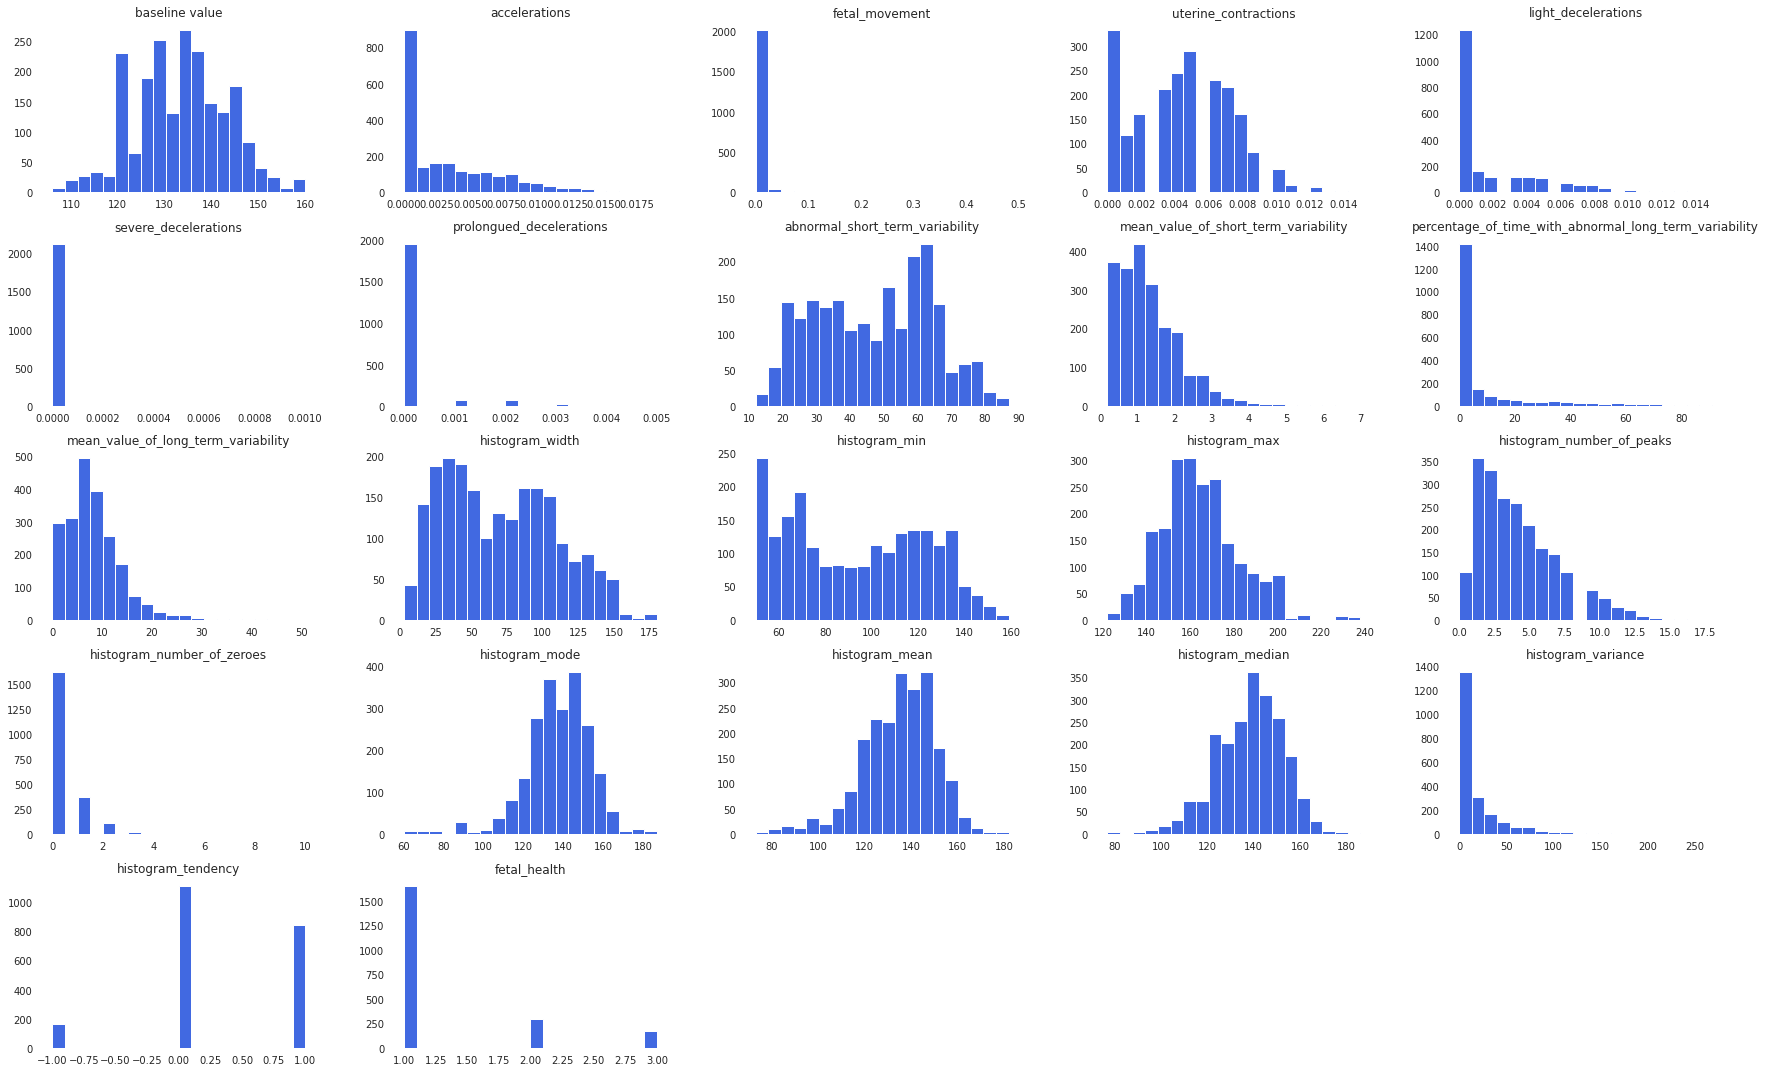

In [10]:
df.hist(figsize=(25,15), bins=20, color = "royalblue", grid=False)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

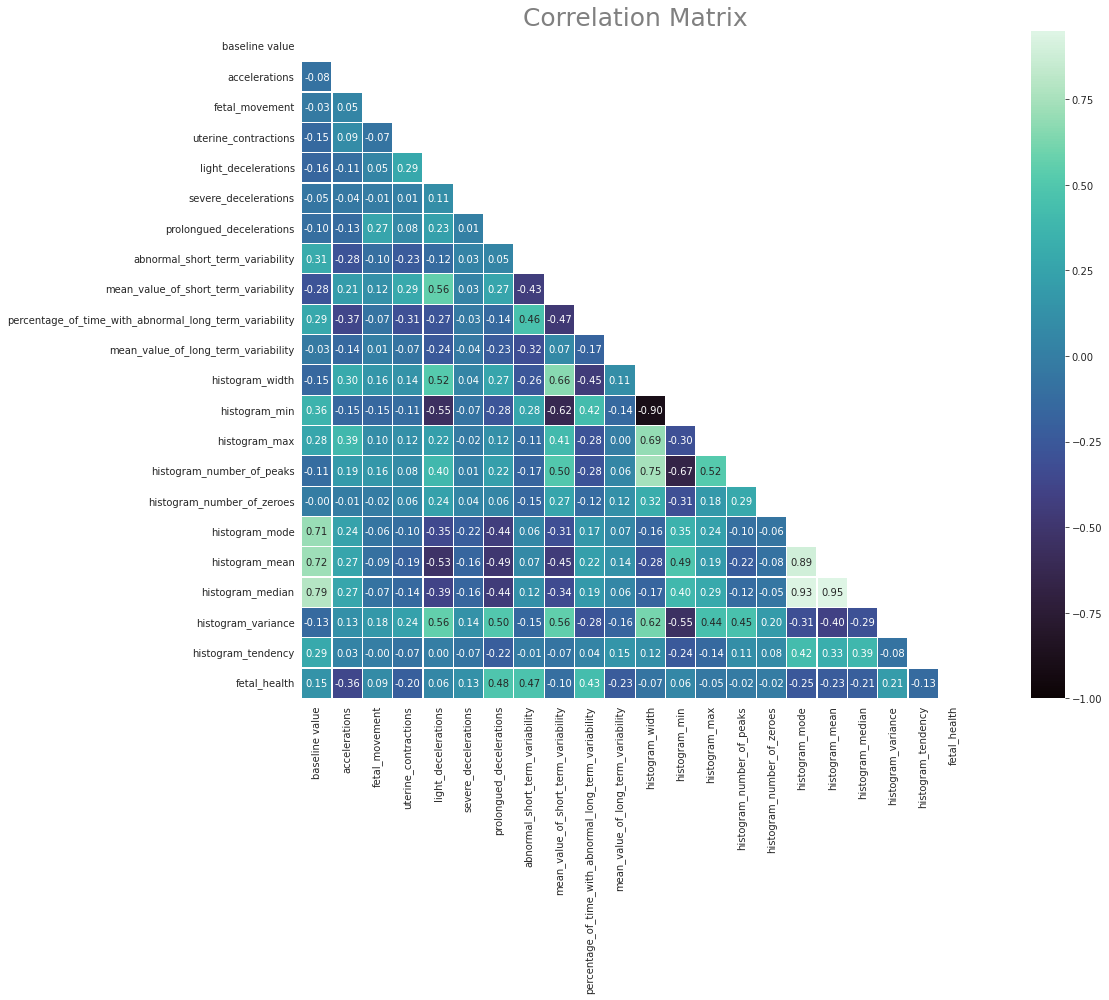

In [11]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(nrows=1, ncols =1, figsize=(20,14))
    ax = sns.heatmap(corr,mask=mask,xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin =-1.0, cmap='mako', fmt='.2f',square=True, linecolor='white',ax = ax,annot=True );



ax.set_title("Correlation Matrix",color= 'Grey', fontsize=25,loc='center')
plt.tight_layout()

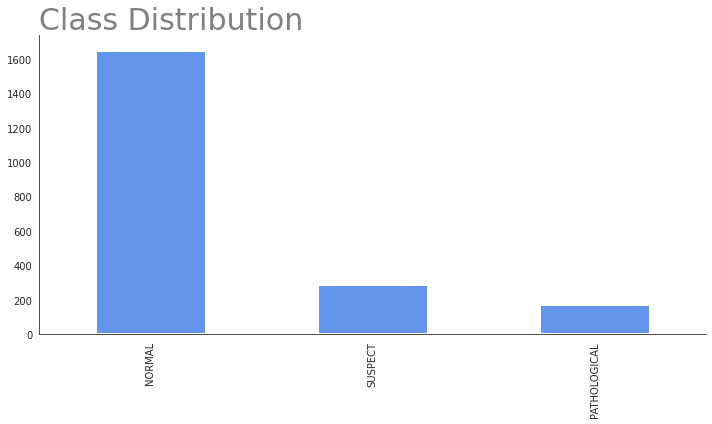

In [13]:
fig, ax = plt.subplots(figsize=(10,6)) 


df['fetal_health'].value_counts().plot(kind="bar", color= 'cornflowerblue', ax=ax,lw='3',grid= False)
ax.xaxis.set_ticklabels(['NORMAL','SUSPECT','PATHOLOGICAL'])

plt.title('Class Distribution',color= 'Grey',size=30,loc='left')
sns.despine()
plt.tight_layout()



In [5]:
df = df.copy()

In [6]:
df['fetal_health'] = df['fetal_health'].replace({1.0:'NORMAL',
                                                 2.0:'SUSPECT',
                                                 3.0:'PATHOLOGICAL'})


# Conclusion of the EDA

We can observe that the dataset is ok, and I don't need to drop or deal with any missing values.

# AUTO Machine Learning with Pycaret

Here we will split the data into test and train and search for the best model that Pycaret will say to us, using their knowledge.

In [9]:
# split the data into test and training
test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [10]:
print(train.shape)
print(test.shape)

(1913, 22)
(213, 22)


In [11]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Setup for PyCaret

Essential things to analyze:
* Our model is a Multiclass Classification, so the change that I made in the feature `fetal_health` will help us with the parameters of the Pycaret.
* The dataset will be the train.
* The target is `fetal_health`

In [12]:
# Setup for PyCaret
clf = setup(data=train, target='fetal_health')

Description                                   Value
0                               session_id                                    5359
1                                   Target                            fetal_health
2                              Target Type                              Multiclass
3                            Label Encoded  NORMAL: 0, PATHOLOGICAL: 1, SUSPECT: 2
4                            Original Data                              (1913, 22)
5                           Missing Values                                   False
6                         Numeric Features                                      20
7                     Categorical Features                                       1
8                         Ordinal Features                                   False
9                High Cardinality Features                                   False
10                 High Cardinality Method                                    None
11                   Transformed Train Set                              (1339, 21)
12                    Transformed Test Set                               (574, 21)
13                      Shuffle Train-Test                                    True
14                     Stratify Train-Test                                   False
15                          Fold Generator                         StratifiedKFold
16                             Fold Number                                      10
17                                CPU Jobs                                      -1
18                                 Use GPU                                   False
19                          Log Experiment                                   False
20                         Experiment Name                        clf-default-name
21                                     USI                                    ff10
22                         Imputation Type                                  simple
23          Iterative Imputation Iteration                                    None
24                         Numeric Imputer                                    mean
25      Iterative Imputation Numeric Model                                    None
26                     Categorical Imputer                                constant
27  Iterative Imputation Categorical Model                                    None
28           Unknown Categoricals Handling                          least_frequent
29                               Normalize                                   False
30                        Normalize Method                                    None
31                          Transformation                                   False
32                   Transformation Method                                    None
33                                     PCA                                   False
34                              PCA Method                                    None
35                          PCA Components                                    None
36                     Ignore Low Variance                                   False
37                     Combine Rare Levels                                   False
38                    Rare Level Threshold                                    None
39                         Numeric Binning                                   False
40                         Remove Outliers                                   False
41                      Outliers Threshold                                    None
42                Remove Multicollinearity                                   False
43             Multicollinearity Threshold                                    None
44             Remove Perfect Collinearity                                    True
45                              Clustering                                   False
46                    Clustering Iteration                                    None
47                     Polynomial Features     

In [13]:
# pipeline
clf = setup(data = df,
            target = 'fetal_health',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'fetal_health_01')

Description                                   Value
0                               session_id                                    4774
1                                   Target                            fetal_health
2                              Target Type                              Multiclass
3                            Label Encoded  NORMAL: 0, PATHOLOGICAL: 1, SUSPECT: 2
4                            Original Data                              (2126, 22)
5                           Missing Values                                   False
6                         Numeric Features                                      20
7                     Categorical Features                                       1
8                         Ordinal Features                                   False
9                High Cardinality Features                                   False
10                 High Cardinality Method                                    None
11                   Transformed Train Set                              (1488, 17)
12                    Transformed Test Set                               (638, 17)
13                      Shuffle Train-Test                                    True
14                     Stratify Train-Test                                   False
15                          Fold Generator                         StratifiedKFold
16                             Fold Number                                      10
17                                CPU Jobs                                      -1
18                                 Use GPU                                   False
19                          Log Experiment                                    True
20                         Experiment Name                         fetal_health_01
21                                     USI                                    af75
22                         Imputation Type                                  simple
23          Iterative Imputation Iteration                                    None
24                         Numeric Imputer                                    mean
25      Iterative Imputation Numeric Model                                    None
26                     Categorical Imputer                                constant
27  Iterative Imputation Categorical Model                                    None
28           Unknown Categoricals Handling                          least_frequent
29                               Normalize                                    True
30                        Normalize Method                                  zscore
31                          Transformation                                    True
32                   Transformation Method                             yeo-johnson
33                                     PCA                                   False
34                              PCA Method                                    None
35                          PCA Components                                    None
36                     Ignore Low Variance                                    True
37                     Combine Rare Levels                                   False
38                    Rare Level Threshold                                    None
39                         Numeric Binning                                   False
40                         Remove Outliers                                   False
41                      Outliers Threshold                                    None
42                Remove Multicollinearity                                    True
43             Multicollinearity Threshold                                    0.95
44             Remove Perfect Collinearity                                    True
45                              Clustering                                   False
46                    Clustering Iteration                                    None
47                     Polynomial Features     

# Comparing Models

We will analyze the best machine learning model to use on the dataset according to Pycaret.

In [15]:
# best = compare_models()
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9456  0.9838  0.8722  0.9453   
rf               Random Forest Classifier    0.9368  0.9804  0.8474  0.9354   
gbc          Gradient Boosting Classifier    0.9348  0.9793  0.8453  0.9329   
et                 Extra Trees Classifier    0.9261  0.9782  0.8248  0.9237   
dt               Decision Tree Classifier    0.8992  0.8804  0.8134  0.9025   
lr                    Logistic Regression    0.8918  0.9589  0.7725  0.8925   
knn                K Neighbors Classifier    0.8918  0.9481  0.7583  0.8898   
svm                   SVM - Linear Kernel    0.8716  0.0000  0.7226  0.8696   
lda          Linear Discriminant Analysis    0.8710  0.9527  0.7323  0.8802   
ada                  Ada Boost Classifier    0.8676  0.8024  0.6848  0.8692   
qda       Quadratic Discriminant Analysis    0.8663  0.9524  0.7677  0.8936   
ridge                    Ridge Classifier    0.8602  0.0000  0.6216  0.8525   
nb                            Naive Bayes    0.8165  0.9239  0.7561  0.8650   
dummy                    Dummy Classifier    0.7762  0.5000  0.3333  0.6025   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9442  0.8476  0.8499     0.374  
rf        0.9337  0.8181  0.8233     0.778  
gbc       0.9325  0.8153  0.8180     1.527  
et        0.9229  0.7886  0.7926     0.608  
dt        0.8989  0.7294  0.7323     0.048  
lr        0.8901  0.7012  0.7036     0.154  
knn       0.8889  0.6946  0.6973     0.167  
svm       0.8654  0.6309  0.6386     0.092  
lda       0.8709  0.6518  0.6557     0.039  
ada       0.8608  0.6190  0.6265     0.323  
qda       0.8729  0.6624  0.6698     0.034  
ridge     0.8446  0.5606  0.5801     0.033  
nb        0.8305  0.5806  0.5994     0.039  
dummy     0.6784  0.0000  0.0000     0.023

In [16]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4774, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [35]:
models()

Name  ...  Turbo
ID                                         ...       
lr                    Logistic Regression  ...   True
knn                K Neighbors Classifier  ...   True
nb                            Naive Bayes  ...   True
dt               Decision Tree Classifier  ...   True
svm                   SVM - Linear Kernel  ...   True
rbfsvm                SVM - Radial Kernel  ...  False
gpc           Gaussian Process Classifier  ...  False
mlp                        MLP Classifier  ...  False
ridge                    Ridge Classifier  ...   True
rf               Random Forest Classifier  ...   True
qda       Quadratic Discriminant Analysis  ...   True
ada                  Ada Boost Classifier  ...   True
gbc          Gradient Boosting Classifier  ...   True
lda          Linear Discriminant Analysis  ...   True
et                 Extra Trees Classifier  ...   True
lightgbm  Light Gradient Boosting Machine  ...   True
dummy                    Dummy Classifier  ...   True

[17 rows x 3 columns]

Looks like the best model is the [LGBMClassifier](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc):

"**Light GBM** *can handle the large size of data and takes lower memory to run. Another reason it is popular is because it focuses on accuracy of results.*"

# Instantiating the model

In [20]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9732  0.9974  0.9127  0.9734  0.9726  0.9251  0.9258
1       0.9530  0.9776  0.9030  0.9522  0.9525  0.8707  0.8708
2       0.9329  0.9822  0.8568  0.9315  0.9311  0.8086  0.8111
3       0.9262  0.9956  0.8035  0.9217  0.9223  0.7868  0.7907
4       0.9195  0.9859  0.8145  0.9186  0.9187  0.7789  0.7792
5       0.9664  0.9908  0.9109  0.9673  0.9653  0.9068  0.9097
6       0.9329  0.9634  0.8379  0.9329  0.9313  0.8130  0.8154
7       0.9597  0.9890  0.9469  0.9649  0.9611  0.8965  0.8983
8       0.9595  0.9835  0.9058  0.9592  0.9589  0.8891  0.8895
9       0.9324  0.9724  0.8304  0.9313  0.9286  0.8005  0.8085
Mean    0.9456  0.9838  0.8722  0.9453  0.9442  0.8476  0.8499
SD      0.0179  0.0100  0.0469  0.0193  0.0188  0.0524  0.0516

In [21]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4774, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Hyper Tunning

In [25]:
# tuning
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9664  0.9938  0.8968  0.9666  0.9654  0.9040  0.9067
1       0.9530  0.9733  0.8911  0.9526  0.9527  0.8705  0.8707
2       0.9195  0.9605  0.8510  0.9183  0.9186  0.7759  0.7764
3       0.9195  0.9894  0.7551  0.9131  0.9134  0.7611  0.7685
4       0.9262  0.9740  0.8084  0.9228  0.9235  0.7893  0.7916
5       0.9396  0.9875  0.8506  0.9376  0.9371  0.8322  0.8348
6       0.9262  0.9632  0.8448  0.9249  0.9245  0.7945  0.7967
7       0.9329  0.9847  0.8964  0.9360  0.9342  0.8258  0.8264
8       0.9595  0.9715  0.9188  0.9595  0.9595  0.8903  0.8903
9       0.9189  0.9689  0.8636  0.9202  0.9195  0.7831  0.7832
Mean    0.9362  0.9767  0.8577  0.9352  0.9348  0.8227  0.8245
SD      0.0168  0.0109  0.0460  0.0177  0.0175  0.0480  0.0473

In [23]:
# Checking the parameters
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=210, n_jobs=-1, num_leaves=50, objective=None,
               random_state=4774, reg_alpha=0.5, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Ploting the model

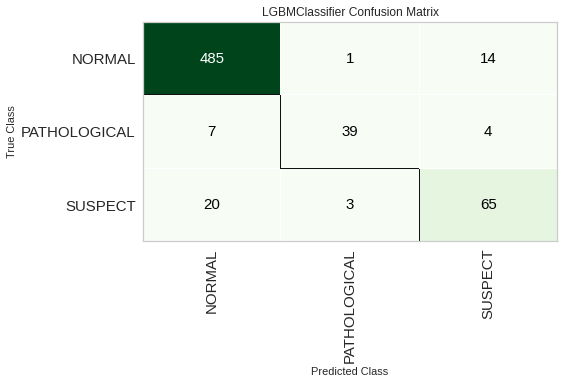

In [26]:
# confusion Matrix
plot_model(tuned_lightgbm, plot='confusion_matrix')

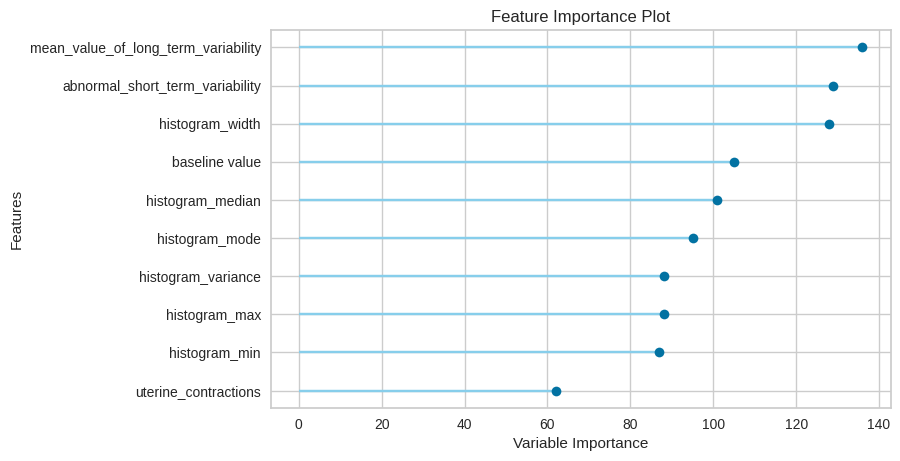

In [27]:
plot_model(tuned_lightgbm, plot='feature')

In [36]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Finalizing model

In [29]:
# Making predictions
predict_model(tuned_lightgbm)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Light Gradient Boosting Machine    0.9232  0.9688  ...  0.9218  0.7792  0.7804

[1 rows x 8 columns]

baseline value  accelerations  ...    Label   Score
0          0.369555      -0.461330  ...  SUSPECT  0.9817
1         -1.031937      -1.009756  ...   NORMAL  0.9993
2         -1.433549      -1.009756  ...   NORMAL  0.9986
3         -0.130033       1.621300  ...   NORMAL  0.9991
4         -0.330202       0.852413  ...   NORMAL  0.9998
..              ...            ...  ...      ...     ...
633        0.868150      -0.461330  ...   NORMAL  0.9692
634       -1.031937       1.031081  ...   NORMAL  0.9999
635       -0.831286      -1.009756  ...   NORMAL  0.9694
636       -2.137192      -1.009756  ...   NORMAL  0.9953
637        0.069947      -0.461330  ...   NORMAL  0.9911

[638 rows x 20 columns]

In [30]:
# finalizing the model
final_lightgbm = finalize_model(tuned_lightgbm)


In [32]:
# Checking the parameters
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=210, n_jobs=-1, num_leaves=50, objective=None,
               random_state=4774, reg_alpha=0.5, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [33]:
# making predictions with test set
test_preds = predict_model(final_lightgbm, data=test)

In [34]:
test_preds 

baseline value  accelerations  ...    Label   Score
0             123.0          0.003  ...   NORMAL  0.9995
1             125.0          0.004  ...   NORMAL  0.9989
2             145.0          0.004  ...   NORMAL  0.9957
3             141.0          0.001  ...  SUSPECT  0.9745
4             124.0          0.006  ...   NORMAL  0.9998
..              ...            ...  ...      ...     ...
208           133.0          0.000  ...   NORMAL  0.6612
209           141.0          0.004  ...   NORMAL  0.9988
210           133.0          0.002  ...   NORMAL  0.9875
211           130.0          0.004  ...   NORMAL  0.9999
212           159.0          0.000  ...  SUSPECT  0.9533

[213 rows x 24 columns]

# Conclusion

* The feature with more importance was `mean_value_of_long_term_variability`;

* The Confusion Matrix shows us an accuracy of 94% to achieve the Normal cases, 90% of the Pathological, and 78% for the Suspect.